# SIR (frequency-dependent mortality) with births, natural deaths and disease-induced mortality
This is the Python version of program 2.4 from page 36 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Parameters (rates here are specified in terms of days)
rho=0.5 #probability of an infectious individual dying due to the disease
beta=520/365.0  #transmission rate
gamma=1/7 #recovery rate
mu=1/(70*365.0)    #death/birth rate

TS=1.0  #time step for integration
ND=1e5 #number of days (end of simulation)

#initial conditions
N0=1    #initial total population
X0=0.2     #intial number of susceptibles
Y0=1e-4         #intial number of infecteds
Z0=N0-X0-Y0  #initial number of recovereds
INPUT = (X0, Y0, Z0)

In [20]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[1]/sum(V) - mu * V[0]
	Y[1] = beta * V[0] * V[1]/sum(V) - (gamma + mu) * V[1]/(1-rho)
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

In [21]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

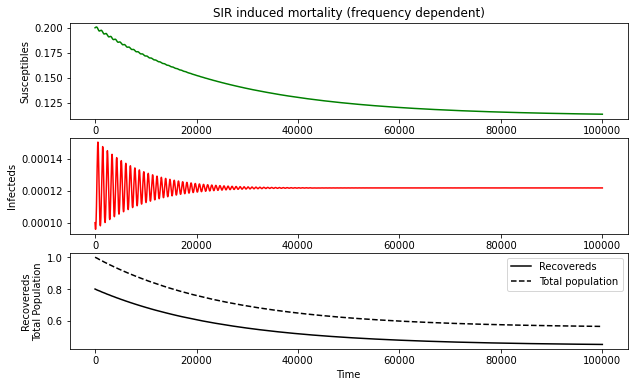

In [22]:
#Ploting
fig = plt.figure(figsize=(10,6))
plt.title('SIR induced mortality (frequency dependent)')
plt.axis('off')
fig.add_subplot(311)
plt.plot(RES[:,0], '-g')
plt.ylabel('Susceptibles')
fig.add_subplot(312)
plt.plot(RES[:,1], '-r')
plt.ylabel('Infecteds')

fig.add_subplot(313)
plt.plot(RES[:,2], '-k',label='Recovereds')
plt.plot(RES[:,0]+RES[:,1]+RES[:,2],'--k',label='Total population')
plt.legend(loc='best')
plt.ylabel('Recovereds\nTotal Population')
plt.xlabel('Time')
plt.show()
fig.savefig('SIR_frequency_mortality_induced.pdf')